# Import statements
Importing generic libararies as well as a few custom functions </br>
In order for this cell to run you must install tensorflow 2.15.1 </br>
You can do this by running the command `pip install tensorflow==2.15.1` or equivalent </br>


In [15]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import vstack

# custom functions
from read_extract import read_file, tvs, hs_preprocessing

# Exploratory Data Analysis
Shows the distribution of documents across classes, and identifies whether there is any significant discrepancy in class representation. If there was any major discrepancy, we could consider bootstrapping techniques such as oversampling.  </br>

Figure 2 shows that the vast majority (97%) of documents contain fewer than 1000 words. Based on this insight, we decided to pad all the documents to a fixed length of `1000` in deep-learning models.

Note: For visualizations to run in their intended way, `seaborn 0.13.2` needs to be installed. You can install with the command `pip install seaborn==0.13.2` or equivalent. </br>

/Users/pranavsingh/Documents/Text_Categorisation_Model/text_preprocessing_visualization.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(counts, x ='count',y = 'category', legend = False, palette = 'viridis').set_title('Documents distribution by Category')


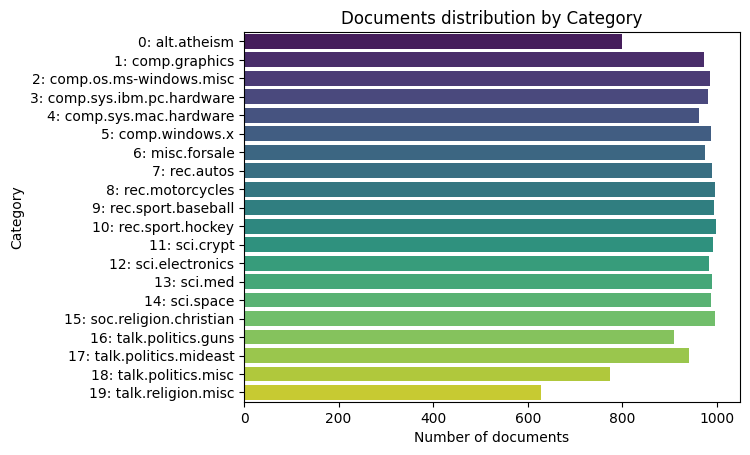

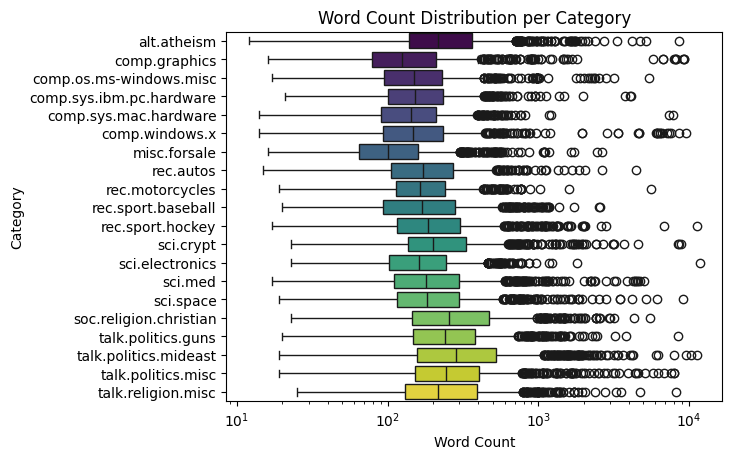

In [16]:
from text_preprocessing_visualization import graphs, conf_matrix
x, y = read_file()
graphs(x, y)

# Traditional Machine Learning: Preprocessing
Here we apply our preprocessing pipeline for the traditional machine learning models. In the first part of the code, we are calling the hs_preprocessing function which cleans the raw text by removing stop words, punctuation, email headers, uuencoded attachment, assigns weight to the subject field, lemmatizes and returns the words in a string format. <br>

The TVS function splits the dataset in Training, Validation, and Test set based on the defined proportion `60:20:20` split in the function. <br> 

The TF-IDF vectorization converts text data (x_train, x_val, x_test) into numerical feature vectors based on term frequencies and inverse document frequencies. <br> 

For more detailed code see `read_extract.py`.

In [17]:
# preprocessing and train, validation, test split
x = x.apply(hs_preprocessing)
x_train, x_val, x_test, y_train, y_val, y_test = tvs(x, y)

# tfidf stuff
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_val_tfidf = tfidf_vectorizer.transform(x_val)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Traditional Machine Learning: Models

### Logistic Regression

Here we evaluate our Logistic regression model. We have defined the `lr` function so that it performs Bayesian optimization to tune the regularization parameter `C` of a Logistic Regression model using TF-IDF training and validation data. The optimized model with the best `C` value is trained and returned. This model is then run on test data to evaluate performance.


For implementation see `text_classification_optimization.py`.


In [21]:
from text_classification_optimization import lr
# Logistic Regression
LR = lr(x_train_tfidf, x_val_tfidf, y_train, y_val)
LR_pred = LR.predict(x_test_tfidf)
print(classification_report(y_test, LR_pred))
# np.save('LR_pred', LR_pred)

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.9058    | 4.176     |
| 2         | 0.9098    | 7.206     |
| 3         | 0.6535    | 0.01114   |
| 4         | 0.9037    | 3.03      |
| 5         | 0.8971    | 1.476     |
| 6         | 0.8912    | 0.9325    |
| 7         | 0.9005    | 1.871     |
| 8         | 0.9042    | 3.462     |
| 9         | 0.9053    | 3.974     |
| 10        | 0.9055    | 5.393     |
| 11        | 0.9095    | 8.771     |
| 12        | 0.9093    | 9.999     |
| 13        | 0.9074    | 6.318     |
| 14        | 0.9093    | 7.996     |
| 15        | 0.9093    | 9.404     |
| 16        | 0.9061    | 4.839     |
| 17        | 0.9037    | 2.445     |
| 18        | 0.9069    | 6.765     |
| 19        | 0.9061    | 5.854     |
| 20        | 0.9087    | 7.614     |
| 21        | 0.9106    | 8.401     |
| 22        | 0.9114    | 9.721     |
| 23        | 0.9093    | 9.076     |
| 24        | 0.9061    | 4.534     |
| 25        

### Support Vector Classifier

Here we evaluate our SVC classifiers. We have defined the `lsvc` function that utilizes Bayesian optimization to tune the regularization parameter `C` of a Linear Support Vector Classifier (LinearSVC) model using TF-IDF on training and validation data. The optimized LinearSVC model with the best `C` value is returned based on the performance evaluated on the validation set. This model is then run on test data to evaluate performance.

The commented svc function is a slightly different variant without a linear kernel. It also has a good performance.

For implementation see `model_optimization.py`.

In [22]:
from model_optimization import lsvc, svc
# Linear SVC
LSVC = lsvc(x_train_tfidf, x_val_tfidf, y_train, y_val)
LSVC.fit(vstack([x_train_tfidf, x_val_tfidf]), np.concatenate((y_train, y_val), axis = 0))
LSVC_pred = LSVC.predict(x_test_tfidf)
print(classification_report(y_test, LSVC_pred))
np.save('LSVC_pred', LSVC_pred)

# Linear SVC with different library
#SVC = svc(x_train, x_test, y_train, y_test)
#SVC.fit(x_train_tfidf, y_train)
#SVC_pred = SVC.predict(x_test_tfidf)
#print(classification_report(y_test, SVC_pred))
#np.save('SVC_pred', SVC_pred)

|   iter    |  target   |     C     |
-------------------------------------


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 1         | 0.9098    | 4.176     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 2         | 0.9085    | 7.206     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 3         | 0.8485    | 0.01114   |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 4         | 0.9098    | 3.03      |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 5         | 0.9103    | 1.476     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 6         | 0.9101    | 0.9325    |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 7         | 0.909     | 1.871     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 8         | 0.9098    | 3.462     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 9         | 0.9098    | 3.974     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 10        | 0.9098    | 5.393     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 11        | 0.9082    | 8.921     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 12        | 0.9079    | 9.999     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 13        | 0.9093    | 6.293     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 14        | 0.9082    | 8.067     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 15        | 0.9101    | 4.836     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 16        | 0.9079    | 2.456     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 17        | 0.9082    | 9.471     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 18        | 0.909     | 6.742     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 19        | 0.9095    | 5.83      |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 20        | 0.9103    | 1.169     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 21        | 0.9082    | 8.482     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 22        | 0.9085    | 7.631     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 23        | 0.9103    | 4.536     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 24        | 0.9095    | 5.122     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 25        | 0.9085    | 2.772     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 26        | 0.9095    | 3.707     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 27        | 0.9098    | 3.239     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 28        | 0.9101    | 1.645     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 29        | 0.9098    | 5.613     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 30        | 0.9103    | 1.039     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 31        | 0.9079    | 9.746     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 32        | 0.9093    | 6.514     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 33        | 0.9103    | 4.673     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 34        | 0.9101    | 1.327     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 35        | 0.9098    | 4.379     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 36        | 0.9095    | 6.055     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 37        | 0.9082    | 9.187     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 38        | 0.9103    | 1.546     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 39        | 0.9103    | 4.602     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


| 40        | 0.9101    | 1.108     |


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.91      0.93       151
           1       0.89      0.85      0.87       196
           2       0.87      0.89      0.88       197
           3       0.81      0.85      0.83       220
           4       0.90      0.90      0.90       186
           5       0.90      0.92      0.91       184
           6       0.87      0.86      0.87       194
           7       0.97      0.96      0.97       190
           8       0.97      0.96      0.96       194
           9       0.97      0.98      0.98       183
          10       0.96      1.00      0.98       207
          11       0.97      0.96      0.97       189
          12       0.90      0.91      0.90       215
          13       0.97      0.97      0.97       221
          14       0.98      0.95      0.96       196
          15       0.93      0.96      0.94       201
          16       0.97      0.97      0.97       170
          17       0.97    

### Stochastic Gradient Descent

Here we evaluate our SGD model. We have defined the `sgd` function that uses Bayesian optimization to tune the `alpha` regularization parameter of a Stochastic Gradient Descent (SGD) Classifier model, training it on TF-IDF transformed training and validation data, and returning the optimized model with the best `alpha` value. This model is then run on test data to evaluate performance.

For implementation see `text_classification_optimization.py`.

In [23]:
from text_classification_optimization import sgd
# Logistic Regression
SGD = sgd(x_train_tfidf, x_val_tfidf, y_train, y_val)
SGD_pred = SGD.predict(x_test_tfidf)
print(classification_report(y_test, SGD_pred))
np.save('SGD_pred', SGD_pred)

|   iter    |  target   |   alpha   |
-------------------------------------
| 1         | 0.861     | 0.0417    |
| 2         | 0.8395    | 0.07203   |
| 3         | 0.9055    | 1.244e-05 |
| 4         | 0.8618    | 0.03023   |
| 5         | 0.8623    | 0.01468   |
| 6         | 0.8626    | 0.009235  |
| 7         | 0.8634    | 0.01863   |
| 8         | 0.8639    | 0.03456   |
| 9         | 0.8604    | 0.03968   |
| 10        | 0.8549    | 0.05388   |
| 11        | 0.8655    | 0.001343  |
| 12        | 0.8867    | 0.0003261 |
| 13        | 0.9047    | 0.0001103 |
| 14        | 0.909     | 2.113e-05 |
| 15        | 0.8923    | 0.0002184 |
| 16        | 0.8758    | 0.0005145 |
| 17        | 0.8695    | 0.0008073 |
| 18        | 0.9098    | 6.356e-05 |
| 19        | 0.8639    | 0.005806  |
| 20        | 0.7424    | 0.09283   |
| 21        | 0.8628    | 0.02086   |
| 22        | 0.8461    | 0.05815   |
| 23        | 0.844     | 0.06888   |
| 24        | 0.848     | 0.06272   |
| 25        

# Deep Learning: Preprocessing

Here we perform the preprocessing designed for the deep learning models we explored. </br>
In order for this cell to run you need to download the [GloVe embedding file](https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt). </br>
You will also need to replace the directory to that of your own.

In [24]:
# GloVe embeddings for deep learning models
embeddings_index = {}
f = open('../glove.6B/glove.6B.100d.txt') # change this to the path of your GloVe file
# https://www.kaggle.com/datasets/sawarn69/glove6b100dtxt link to GloVe embedding file
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# hyperparameters for the deep learning models
max_words = 20_000
max_seq_length = 1000 # original 1000
embedding_dim = 100 # embedding dimension (GloVe size)
filter_sizes = [5,5,5]
num_filters = 512
drop = 0.5

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
word_index = tokenizer.word_index

embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector # words not found in embedding index will be all-zeros.

# padding sequences for deep learning models
x_pad = pad_sequences(sequences, maxlen = max_seq_length)
y_pad = to_categorical(np.asarray(y))

x_train, x_val, x_test, y_train, y_val, y_test = tvs(x_pad, y_pad) # train validation and test needed for deep learning

# Deep Learning: Models
### Convolutional Neural Network
Here we evaluate our CNN. For implementation see `cnn_and_ensemble_model.py`.

In [ ]:
# cnn
from cnn_and_ensemble_model import cnn
CNN = cnn(
    word_index,
    embedding_matrix,
    max_seq_length,
    embedding_dim,
    filter_sizes,
    num_filters,
    drop
)
CNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
CNN.fit(x_train, y_train, batch_size = 30, epochs = 12, verbose = 1, validation_data = (x_val, y_val))
CNN_pred = CNN.predict(x_test)
CNN_pred = np.argmax(CNN_pred, axis = 1)
y_tests = np.argmax(y_test, axis = 1)
print(classification_report(y_tests, CNN_pred))
np.save('CNN_pred', CNN_pred)

# Recurrent Neural Network
Here we evaluate our RNN. For implementation see `rnn_model.py`.

In [ ]:
# rnn
from rnn_model import RNN
RNN = RNN(
    word_index,
    embedding_matrix,
    max_seq_length,
    embedding_dim
)
RNN.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
RNN.fit(x_train, y_train, batch_size = 30, epochs = 12, verbose = 1, validation_data = (x_val, y_val))
RNN_pred = RNN.predict(x_test)
RNN_pred = np.argmax(RNN_pred, axis = 1)
y_tests = np.argmax(y_test, axis = 1)
print(classification_report(y_tests, RNN_pred))
np.save('RNN_pred', RNN_pred)

# Ensemble

Here we implement both the modal ensemble as well as the averaging ensemble. Much to our surprise </br>
the model ensemble sees no improvmenet in performance and the average ensebmle actually makes performance worse.

In [5]:
from cnn_and_ensemble_model import ensemble

ensemble(
    embeddings_index,
    y_test
)

LR + LSVC give an average embedding accuracy of:  0.9246684350132626
LR + SVC give an average embedding accuracy of:  0.9132625994694961
LR + SGD give an average embedding accuracy of:  0.9225464190981433
LR + RNN give an average embedding accuracy of:  0.8485411140583554
LR + CNN give an average embedding accuracy of:  0.8848806366047746
LSVC + SVC give an average embedding accuracy of:  0.916445623342175
LSVC + SGD give an average embedding accuracy of:  0.9286472148541114
LSVC + RNN give an average embedding accuracy of:  0.8522546419098144
LSVC + CNN give an average embedding accuracy of:  0.889920424403183
SVC + SGD give an average embedding accuracy of:  0.9145888594164456
SVC + RNN give an average embedding accuracy of:  0.8424403183023873
SVC + CNN give an average embedding accuracy of:  0.8787798408488063
SGD + RNN give an average embedding accuracy of:  0.8490716180371353
SGD + CNN give an average embedding accuracy of:  0.8877984084880637
RNN + CNN give an average embedding 